In [17]:
import numpy as np

# Coordinate descent function

In [25]:
def coordinate_descent(X, y, N, d, lam, initial_weights, initial_bias):
    # Setting up initial weights
    w = initial_weights
    
    # Setting up initial bias
    bias = initial_bias
    b = bias * np.ones(shape=(N, 1))
    
    # Setting up values of ak
    a = np.ones(shape=(d, 1))
    for i in range(d):
        a[i] = 2 * np.sum(X[i] * X[i])

    # Creating ck for k from 1 to d
    c = np.ones(shape=(d, 1))
    
    old_obj = 0

    while True:

        # calculating r
        xtw = np.matmul(np.transpose(X), w)
        addition = np.add(xtw, b)
        r = np.subtract(y, addition)

        # updating bias
        bias += (np.sum(r) / float(N))
        b = bias * np.ones(shape=(N, 1))

        # updating r
        constant = np.sum(r) / float(N)
        r = np.subtract(r, constant * np.ones(shape=(N, 1)))

        # k loop
        for k in range(d):
            # updating c
            summation = 0
            for i in range(N):
                summation += (X[k][i] * (r[i] + (w[k] * X[k][i])))
            c[k] = summation * 2

            # updating w
            wk_old = w[k]

            if c[k] < (-1) * lam:
                w[k] = float(c[k] + lam) / float(a[k])
            elif c[k] > lam:
                w[k] = float(c[k] - lam) / float(a[k])
            else:
                w[k] = 0

            # updating r
            # take transpose of kth row of X (corresponds to kth dimension), multiply it by (w_old - w_new)
            #r = np.add(r, (wk_old - w[k]) * np.reshape(X[k], newshape=(N, 1)))
            r = np.add(r, (wk_old - w[k]) * np.transpose([X[k]]))
        
        objective = np.sum(r * r) + (lam * np.sum(abs(w)))
        #print objective
        
        if abs(objective - old_obj) < 3:
            break
        
        old_obj = objective
        
    return w, bias

# Regularization path

In [19]:
def regularization_path(X, y, N, d, lammax):
    lambda_val = lammax

    initial_bias = 1
    initial_weights = np.ones(shape=(d, 1))

    lambdas = []
    totals = []
    corrects = []
    precisions = []
    recalls = []

    for i in range(10):
        weights, bias = coordinate_descent(X, y, N, d, lambda_val, initial_weights, initial_bias)
        print "Iteration ", i + 1
        print "lambda = ", lambda_val

        lambdas.append(lambda_val)

        total = np.count_nonzero(weights)
        print "total nonzero weights = ",  total
        totals.append(total)

        correct = np.count_nonzero(weights[:k])
        print "correct nonzero weights = ", correct
        corrects.append(correct)

        try:
            p = float(correct) / float(total)
            print "precision = ", p
            precisions.append(p)
        except ZeroDivisionError:
            print "Dividing by zero"
            precisions.append(1)

        try:
            r = float(correct) / float(k)
            print "recall = ", r
            recalls.append(r)
        except ZeroDivisionError:
            print "Dividing by zero"
            recalls.append(1)

        print ""
        #raw_input("Enter a character to continue: ")
        initial_weights = weights
        initial_bias = bias
        lambda_val /= 2
    
    return lambdas, totals, corrects, precisions, recalls

# Sigma = 1

## Synthetic Data Setup

In [20]:
N = 250
d = 80
k = 10
sigma = 1

X = np.random.normal(0, 1, (d, N))

b_star = 0
bias = b_star * np.ones(shape=(N, 1))

w_star = np.ndarray(shape=(d,1))
w_star[0][0] = 10
w_star[1][0] = -10
w_star[2][0] = -10
w_star[3][0] = 10
w_star[4][0] = -10
w_star[5][0] = 10
w_star[6][0] = 10
w_star[7][0] = 10
w_star[8][0] = -10
w_star[9][0] = 10

for i in range(10, d):
    w_star[i][0] = 0

epsilon = np.random.normal(0, sigma, (N, 1))

y = np.matmul(np.transpose(X), w_star)
y = np.add(y, bias)
y = np.add(y, epsilon)

In [21]:
const = np.sum(y) / float(N)
temp = np.subtract(y, const * np.ones(shape=(N, 1)))
mult = np.matmul(X, temp)
lammax = 2 * np.linalg.norm(mult, np.inf)

## Calculations

In [26]:
lambdas, totals, corrects, precisions, recalls = regularization_path(X, y, N, d, lammax)

Iteration  1
lambda =  5878.51090234
total nonzero weights =  0
correct nonzero weights =  0
Dividing by zero
recall =  0.0

Iteration  2
lambda =  2939.25545117
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  3
lambda =  1469.62772558
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  4
lambda =  734.813862792
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  5
lambda =  367.406931396
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  6
lambda =  183.703465698
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  7
lambda =  91.851732849
total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0

Iteration  8
lambda =  45.9258664245
total nonzero weights =  19
correct nonzero weights =  10
precision =  0.5263

## Plot

In [27]:
iters = [1,2,3,4,5,6,7,8,9,10]
y_axis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

### Plot of precision vs iteration number

#### Here, precision has been plotted against the iteration number, where lambda starts from the maximum value and decreases by a factor of 2 in each iteration. As the graph shows, the precision is 1 when the value of lambda is high, and decreases consequently in each iteration as lambda decreases.

#### Continuous plot

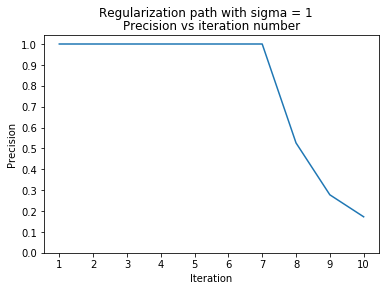

In [28]:
import matplotlib.pyplot as plt
plt.plot(iters, precisions)
plt.xticks(iters)
plt.yticks(y_axis)
plt.xlabel("Iteration")
plt.ylabel("Precision")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Precision vs iteration number")
plt.show()

#### Discrete plot

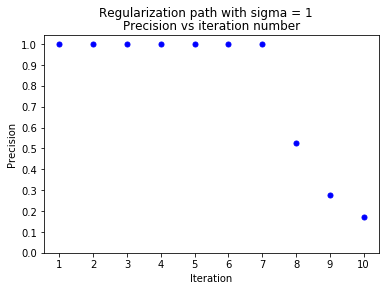

In [31]:
import matplotlib.pyplot as plt
plt.plot(iters, precisions, "bo", markersize=5)
plt.xticks(iters)
plt.yticks(y_axis)
plt.xlabel("Iteration")
plt.ylabel("Precision")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Precision vs iteration number")
plt.show()

### Plot of recall vs iteration number

#### Here, recall has been plotted against the iteration number, where lambda starts from the maximum value and decreases by a factor of 2 in each iteration. As the graph shows, the recall is 0 in the first iteration, and is 1 in all consecutive iterations. This is because when the value of lambda is maximum, all the weights are zero. Hence, none of the 10 weights set to zero are identified by the model. However, when the value of lambda is decreased, all the real nonzero weights are correctly identified by the model.

#### Continuous plot

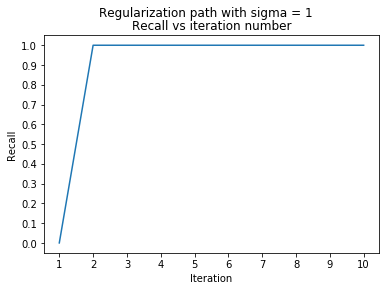

In [32]:
import matplotlib.pyplot as plt
plt.plot(iters, recalls)
plt.xticks(iters)
plt.yticks(y_axis)
plt.xlabel("Iteration")
plt.ylabel("Recall")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Recall vs iteration number")
plt.show()

#### Discrete plot

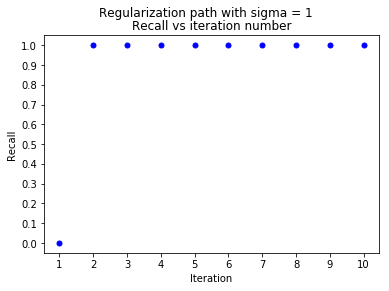

In [33]:
import matplotlib.pyplot as plt
plt.plot(iters, recalls, "bo", markersize=5)
plt.xticks(iters)
plt.yticks(y_axis)
plt.xlabel("Iteration")
plt.ylabel("Recall")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Recall vs iteration number")
plt.show()

### Plot of number of nonzero weights vs iteration number

#### Here, the number of nonzero weights for each iteration have been plotted, where lambda starts from the maximum value and decreases by a factor of 2 in each iteration. As the graph shows, the number of nonzero weights is 0 when the value of lambda is maximum. It is 10 till the sixth iteration, and consistently increases after that.

#### Continuous plot

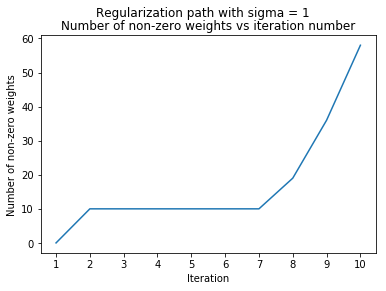

In [34]:
import matplotlib.pyplot as plt
plt.plot(iters, totals)
plt.xticks(iters)
plt.xlabel("Iteration")
plt.ylabel("Number of non-zero weights")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Number of non-zero weights vs iteration number")
plt.show()

#### Discrete plot

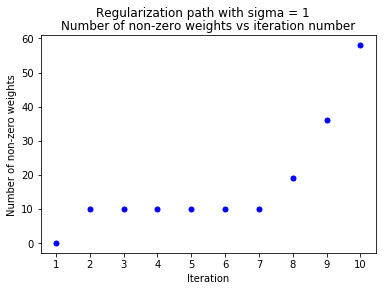

In [35]:
import matplotlib.pyplot as plt
plt.plot(iters, totals, "bo", markersize=5)
plt.xticks(iters)
plt.xlabel("Iteration")
plt.ylabel("Number of non-zero weights")
plt.suptitle("Regularization path with sigma = 1")
plt.title("Number of non-zero weights vs iteration number")
plt.show()

# Sigma = 10

## Synthetic Data setup

In [36]:
N = 250
d = 80
k = 10
sigma = 10

X = np.random.normal(0, 1, (d, N))

b_star = 0
bias = b_star * np.ones(shape=(N, 1))

w_star = np.ndarray(shape=(d,1))
w_star[0][0] = 10
w_star[1][0] = -10
w_star[2][0] = -10
w_star[3][0] = 10
w_star[4][0] = -10
w_star[5][0] = 10
w_star[6][0] = 10
w_star[7][0] = 10
w_star[8][0] = -10
w_star[9][0] = 10

for i in range(10, d):
    w_star[i][0] = 0

epsilon = np.random.normal(0, sigma, (N, 1))

y = np.matmul(np.transpose(X), w_star)
y = np.add(y, bias)
y = np.add(y, epsilon)

## Calculation

### When sigma was 1, value of lambda that worked well was 734.813862792, in the 4th iteration. This value of lambda has been used here.

In [39]:
initial_bias = 1
initial_weights = np.ones(shape=(d, 1))
weights, bias = coordinate_descent(X, y, N, d, 734.813862792, initial_weights, initial_bias)

In [40]:
total = np.count_nonzero(weights)
print "total nonzero weights = ",  total

correct = np.count_nonzero(weights[:k])
print "correct nonzero weights = ", correct

try:
    p = float(correct) / float(total)
    print "precision = ", p
except ZeroDivisionError:
    print "Dividing by zero"

try:
    r = float(correct) / float(k)
    print "recall = ", r
except ZeroDivisionError:
    print "Dividing by zero"

total nonzero weights =  14
correct nonzero weights =  10
precision =  0.714285714286
recall =  1.0


#### It can be seen that the precision has reduced, while the recall is still the same.

#### Increasing the value of lambda results in a higher value of precision, as can be seen from the following result:

In [41]:
initial_bias = 1
initial_weights = np.ones(shape=(d, 1))
weights, bias = coordinate_descent(X, y, N, d, 1469.62772558, initial_weights, initial_bias)

In [42]:
total = np.count_nonzero(weights)
print "total nonzero weights = ",  total

correct = np.count_nonzero(weights[:k])
print "correct nonzero weights = ", correct

try:
    p = float(correct) / float(total)
    print "precision = ", p
except ZeroDivisionError:
    print "Dividing by zero"

try:
    r = float(correct) / float(k)
    print "recall = ", r
except ZeroDivisionError:
    print "Dividing by zero"

total nonzero weights =  10
correct nonzero weights =  10
precision =  1.0
recall =  1.0
